In [17]:
#visuals

#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error,mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [18]:
#import dataset
train=pd.read_csv('./datasets/train.csv')
test=pd.read_csv('./datasets/test.csv')

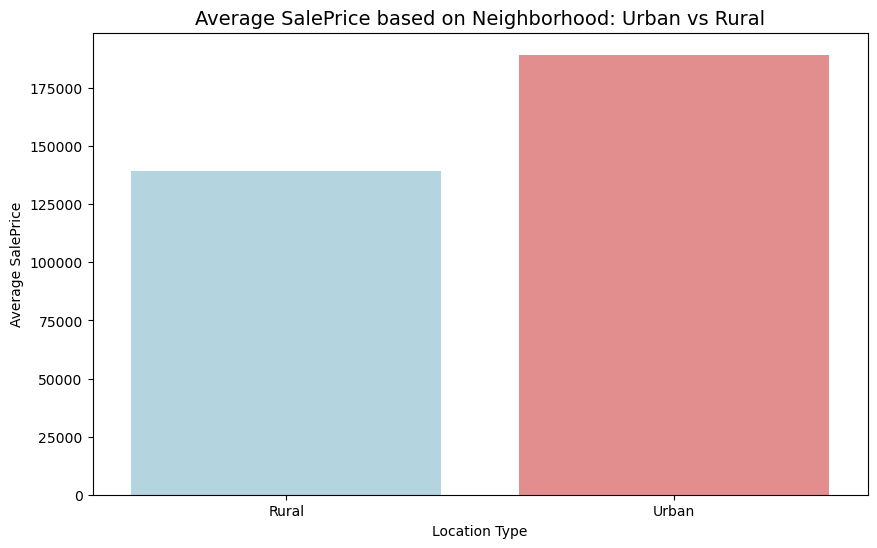

In [19]:
# define urban and rural neighborhoods
urban_neighborhoods = [
    'Sawyer', 'SawyerW', 'NAmes', 'OldTown', 'BrDale', 'CollgCr', 'Somerst', 
    'Mitchel', 'StoneBr', 'NridgHt', 'Gilbert', 'Crawfor', 'NWAmes', 'Veenker', 
    'NoRidge', 'ClearCr', 'Blmngtn', 'BrkSide', 'NPkVill', 'GrnHill', 'Greens', 
    'Landmrk'
]
rural_neighborhoods = [
    'Timber', 'Edwards', 'MeadowV', 'IDOTRR', 'SWISU', 'Blueste'
]

train['Location Type'] = train['Neighborhood'].apply(lambda x: 'Urban' if x in urban_neighborhoods else 'Rural')
mean_saleprice_by_location = train.groupby('Location Type')['SalePrice'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_saleprice_by_location.index, y=mean_saleprice_by_location.values, palette=['lightblue', 'lightcoral'])
plt.title('Average SalePrice based on Neighborhood: Urban vs Rural', fontsize=14)
plt.xlabel('Location Type')
plt.ylabel('Average SalePrice')
plt.xticks(rotation=0)
plt.show()


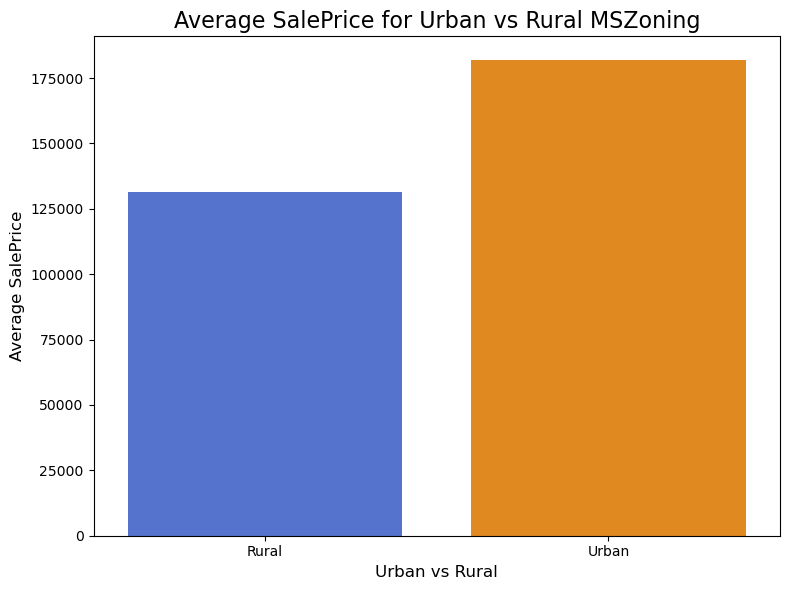

In [20]:

urban_zoning = ['RL', 'RM', 'FV', 'C (all)'] 
rural_zoning = ['A (agr)', 'RH', 'I (all)'] 

train['UrbanRural'] = train['MS Zoning'].apply(lambda x: 'Urban' if x in urban_zoning else ('Rural' if x in rural_zoning else 'Other'))

urban_rural_saleprice = train.groupby('UrbanRural')['SalePrice'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='UrbanRural', y='SalePrice', data=urban_rural_saleprice, palette=['royalblue', 'darkorange'])

plt.title('Average SalePrice for Urban vs Rural MSZoning', fontsize=16)
plt.xlabel('Urban vs Rural', fontsize=12)
plt.ylabel('Average SalePrice', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()



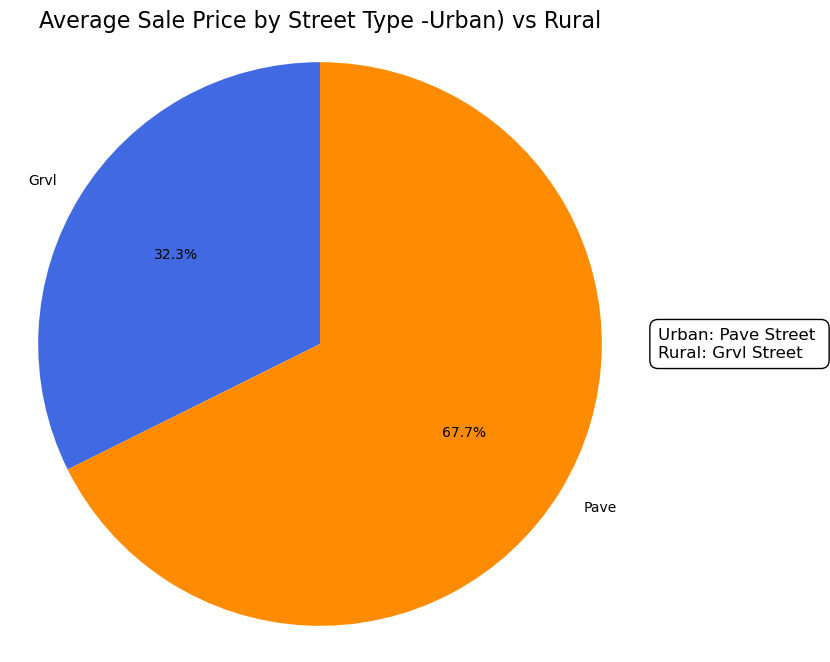

In [21]:
#visuals for street
#Pave for Urban
#Grvl for rural

train['Street'].unique()

street_saleprice_mean = train.groupby('Street')['SalePrice'].mean()

plt.figure(figsize=(8, 8))
plt.pie(street_saleprice_mean, labels=street_saleprice_mean.index, autopct='%1.1f%%', startangle=90, colors=['royalblue', 'darkorange'])

plt.title('Average Sale Price by Street Type -Urban) vs Rural', fontsize=16)

plt.text(1.2, 0, 'Urban: Pave Street \nRural: Grvl Street', fontsize=12, verticalalignment='center', horizontalalignment='left', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.axis('equal')  
plt.show()



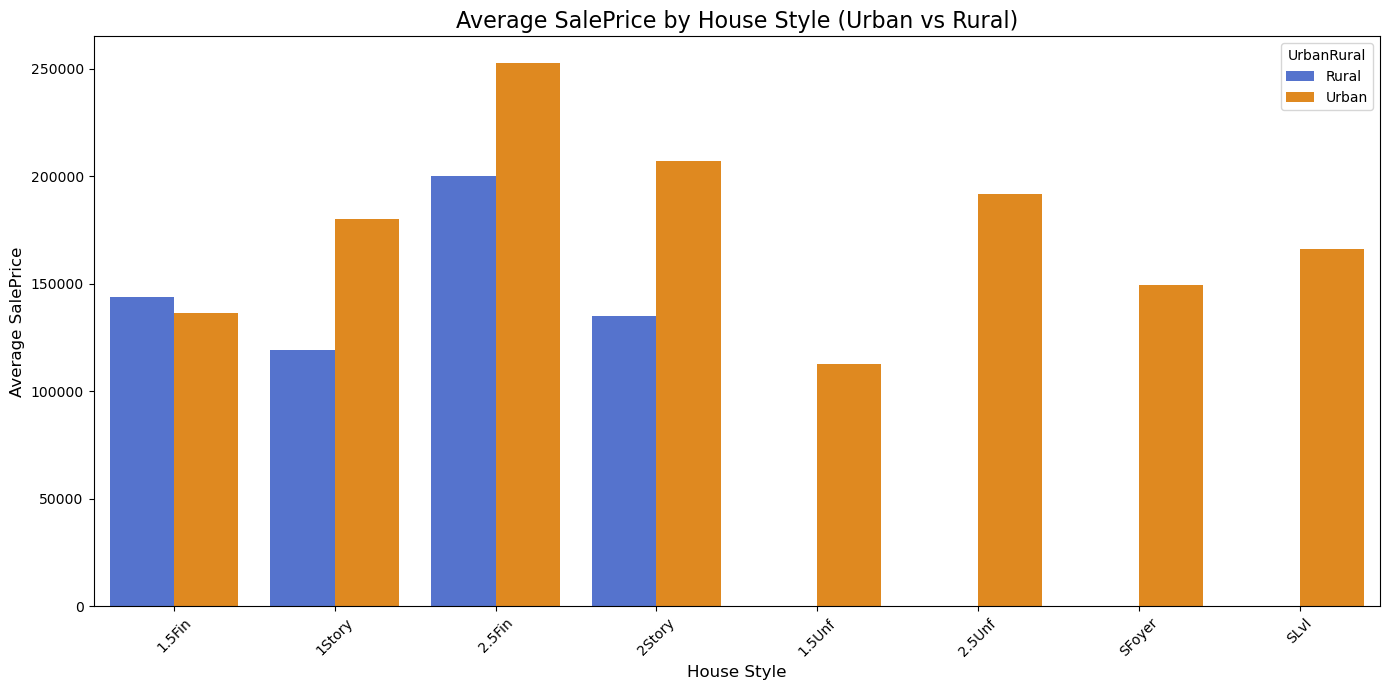

In [22]:
# Define the MS Zoning categories for Urban and Rural
urban_zoning = ['RL', 'RM', 'FV', 'C (all)'] 
rural_zoning = ['A (agr)', 'RH', 'I (all)']  
train['UrbanRural'] = train['MS Zoning'].apply(lambda x: 'Urban' if x in urban_zoning else ('Rural' if x in rural_zoning else 'Other'))
house_styles = ['2Story', '1Story', '1.5Fin', 'SFoyer', 'SLvl', '2.5Unf', '2.5Fin', '1.5Unf']
train_filtered = train[train['House Style'].isin(house_styles)]
house_style_saleprice = train_filtered.groupby(['UrbanRural', 'House Style'])['SalePrice'].mean().reset_index()
plt.figure(figsize=(14, 7))
sns.barplot(x='House Style', y='SalePrice', hue='UrbanRural', data=house_style_saleprice, palette=['royalblue', 'darkorange'])
plt.title('Average SalePrice by House Style (Urban vs Rural)', fontsize=16)
plt.xlabel('House Style', fontsize=12)
plt.ylabel('Average SalePrice', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

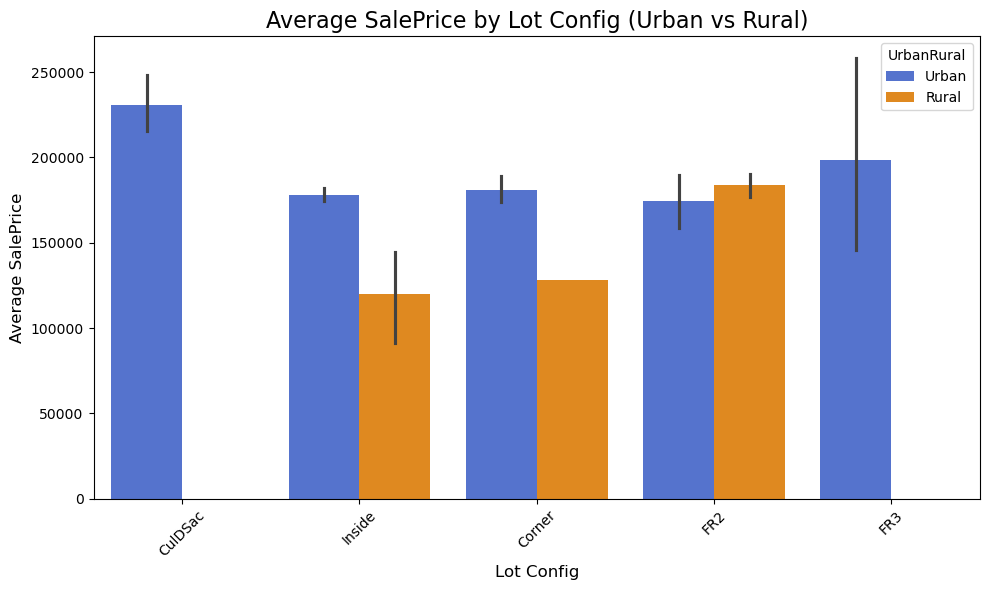

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Lot Config', y='SalePrice', hue='UrbanRural', data=train, palette=['royalblue', 'darkorange'])
plt.title('Average SalePrice by Lot Config (Urban vs Rural)', fontsize=16)
plt.xlabel('Lot Config', fontsize=12)
plt.ylabel('Average SalePrice', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

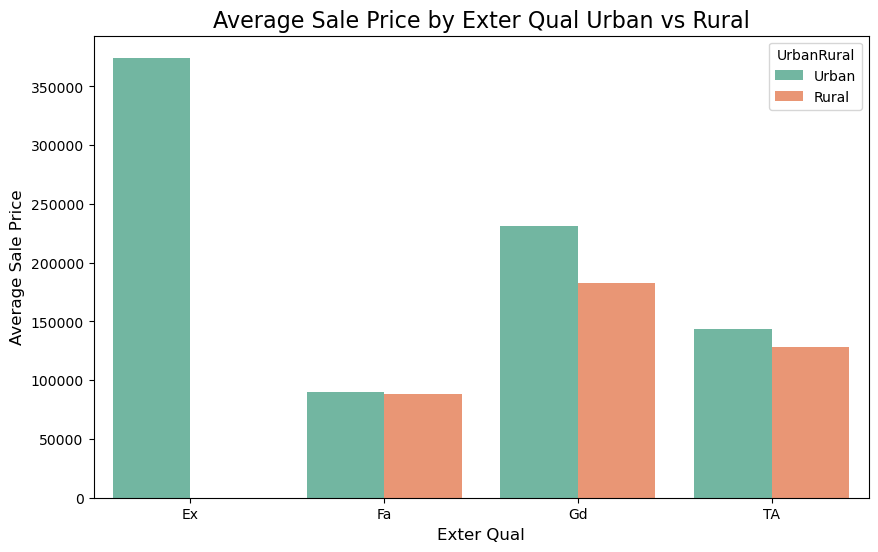

In [24]:
urban_zoning = ['RL', 'RM', 'FV', 'C (all)'] 
rural_zoning = ['A (agr)', 'RH', 'I (all)']  
train['UrbanRural'] = train['MS Zoning'].apply(lambda x: 'Urban' if x in urban_zoning else ('Rural' if x in rural_zoning else 'Other'))
grouped_exter_qual = train.groupby(['Exter Qual', 'UrbanRural'])['SalePrice'].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(x='Exter Qual', y='SalePrice', hue='UrbanRural', data=grouped_exter_qual, palette='Set2')


plt.title('Average Sale Price by Exter Qual Urban vs Rural', fontsize=16)
plt.xlabel('Exter Qual', fontsize=12)
plt.ylabel('Average Sale Price', fontsize=12)


plt.show()


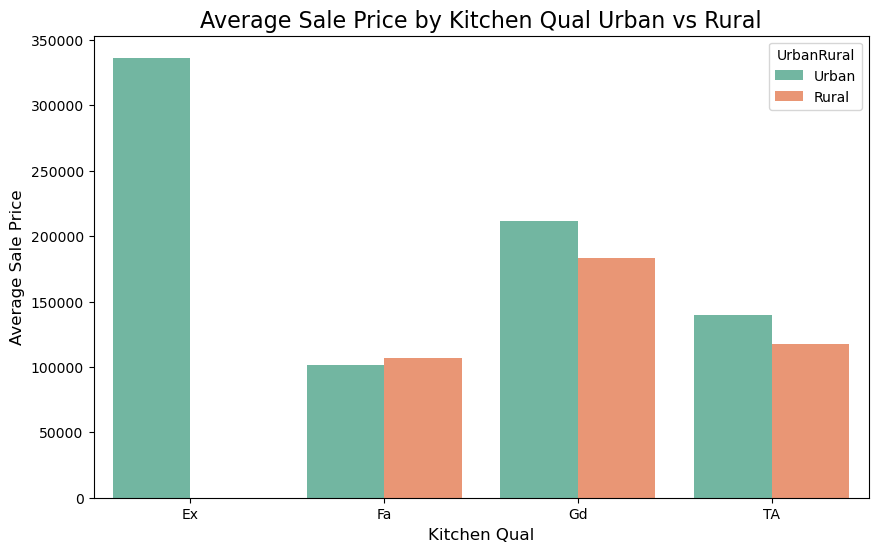

In [25]:
grouped_kitchen_qual = train.groupby(['Kitchen Qual', 'UrbanRural'])['SalePrice'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Kitchen Qual', y='SalePrice', hue='UrbanRural', data=grouped_kitchen_qual, palette='Set2')
plt.title('Average Sale Price by Kitchen Qual Urban vs Rural', fontsize=16)
plt.xlabel('Kitchen Qual', fontsize=12)
plt.ylabel('Average Sale Price', fontsize=12)
plt.show()

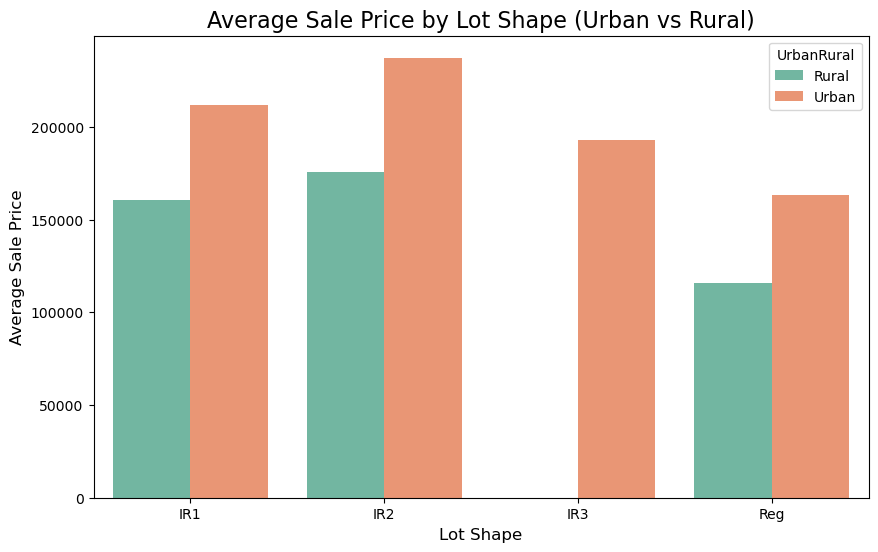

In [26]:
grouped_lot_shape = train.groupby(['Lot Shape', 'UrbanRural'])['SalePrice'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Lot Shape', y='SalePrice', hue='UrbanRural', data=grouped_lot_shape, palette='Set2')
plt.title('Average Sale Price by Lot Shape (Urban vs Rural)', fontsize=16)
plt.xlabel('Lot Shape', fontsize=12)
plt.ylabel('Average Sale Price', fontsize=12)
plt.show()

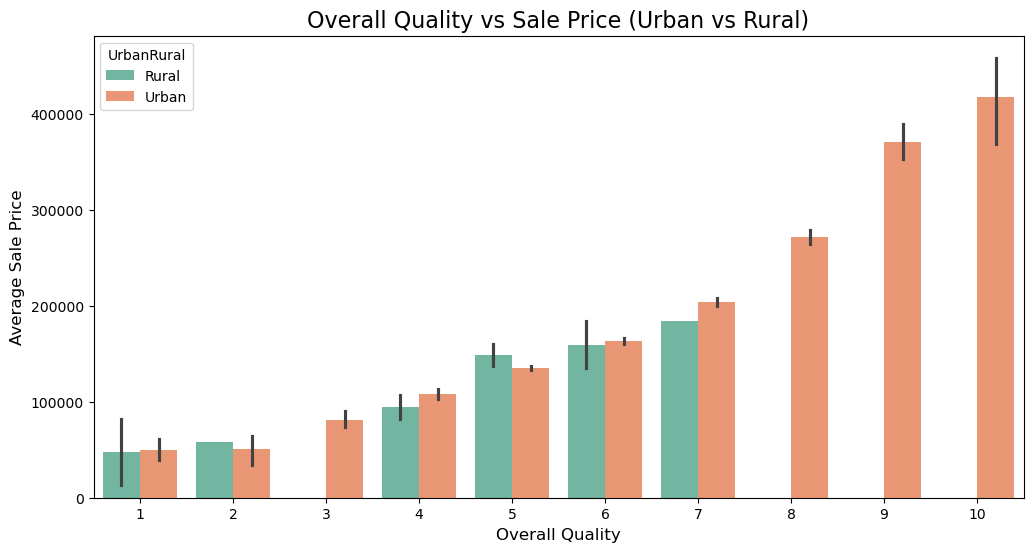

In [27]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Overall Qual', y='SalePrice', hue='UrbanRural', data=train, palette='Set2')
plt.title('Overall Quality vs Sale Price (Urban vs Rural)', fontsize=16)
plt.xlabel('Overall Quality', fontsize=12)
plt.ylabel('Average Sale Price', fontsize=12)
plt.show()

Text(0, 0.5, 'Average Sale Price')

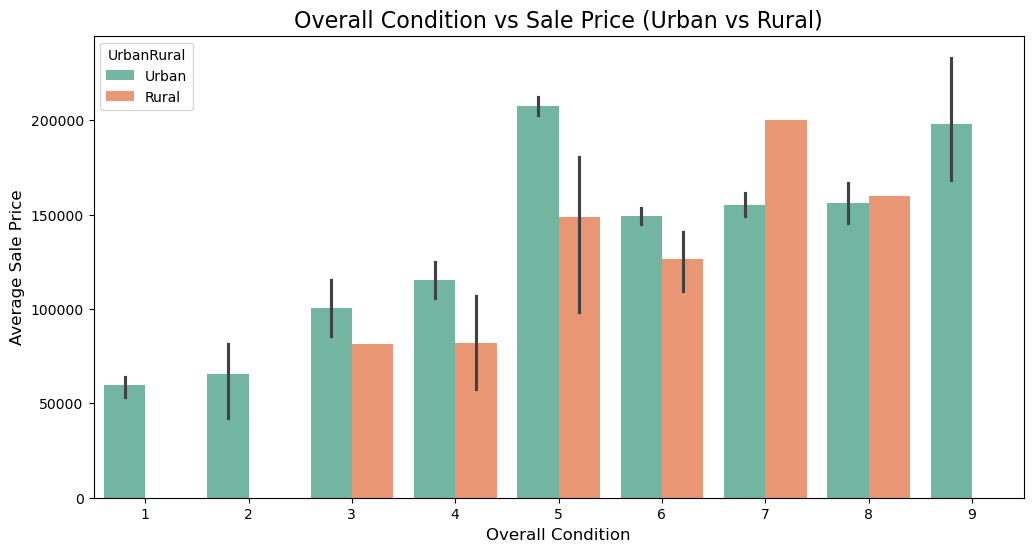

In [28]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Overall Cond', y='SalePrice', hue='UrbanRural', data=train, palette='Set2')
plt.title('Overall Condition vs Sale Price (Urban vs Rural)', fontsize=16)
plt.xlabel('Overall Condition', fontsize=12)
plt.ylabel('Average Sale Price', fontsize=12)

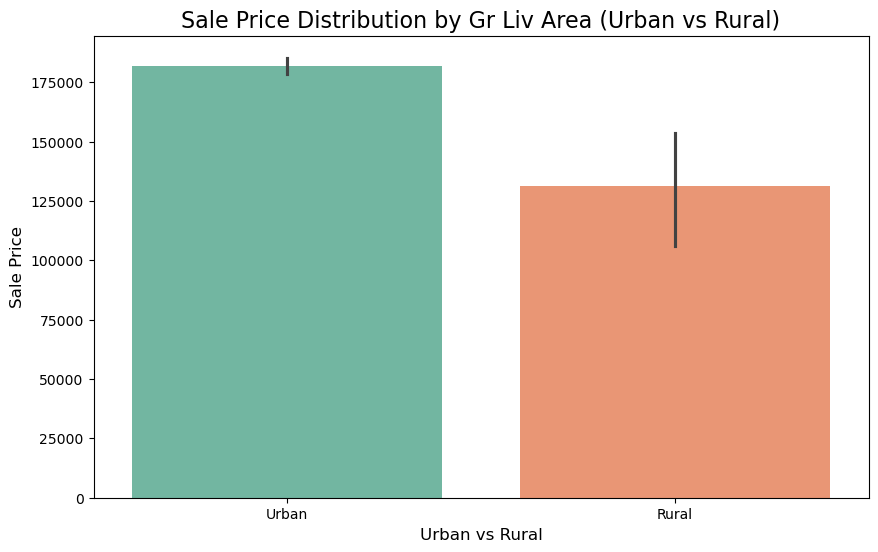

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x='UrbanRural', y='SalePrice', data=train, palette='Set2')
plt.title('Sale Price Distribution by Gr Liv Area (Urban vs Rural)', fontsize=16)
plt.xlabel('Urban vs Rural', fontsize=12)
plt.ylabel('Sale Price', fontsize=12)
plt.show()


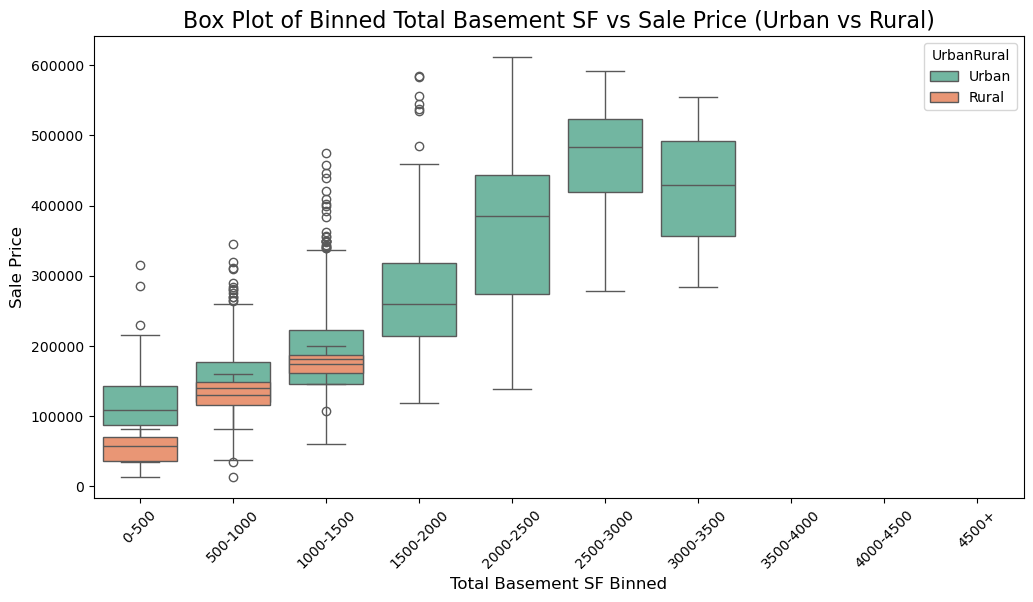

In [30]:
bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
labels = ['0-500', '500-1000', '1000-1500', '1500-2000', '2000-2500', '2500-3000', '3000-3500', '3500-4000', '4000-4500', '4500+']
train['Bsmt SF Binned'] = pd.cut(train['Total Bsmt SF'], bins=bins, labels=labels, right=False)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Bsmt SF Binned', y='SalePrice', hue='UrbanRural', data=train, palette='Set2')
plt.title('Box Plot of Binned Total Basement SF vs Sale Price (Urban vs Rural)', fontsize=16)
plt.xlabel('Total Basement SF Binned', fontsize=12)
plt.ylabel('Sale Price', fontsize=12)
plt.xticks(rotation=45)
plt.show()

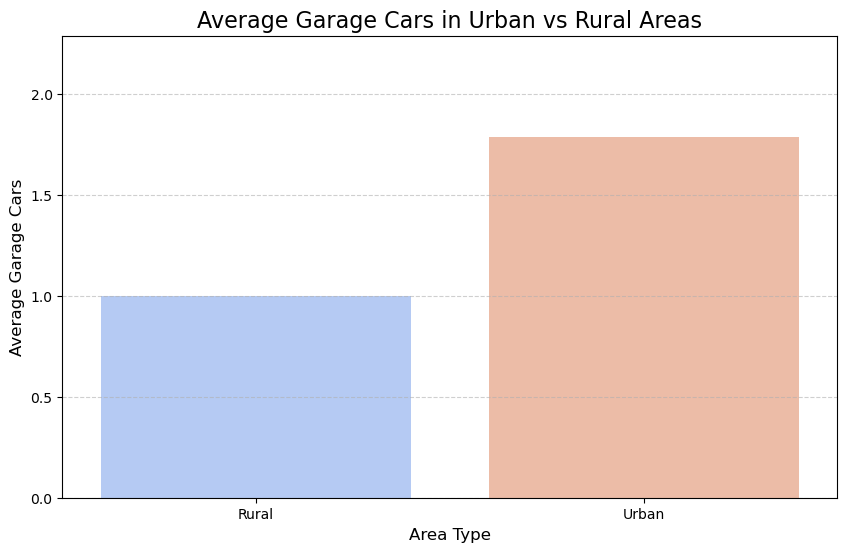

In [31]:

urban_zones = ['FV', 'RL', 'RM']
rural_zones = ['RH', 'A (agr)', 'C (all)', 'I (all)']


train['Area Type'] = train['MS Zoning'].apply(lambda x: 'Urban' if x in urban_zones else 'Rural')


avg_garage_cars = train.groupby('Area Type')['Garage Cars'].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(data=avg_garage_cars, x='Area Type', y='Garage Cars', palette='coolwarm')

plt.title('Average Garage Cars in Urban vs Rural Areas', fontsize=16)
plt.xlabel('Area Type', fontsize=12)
plt.ylabel('Average Garage Cars', fontsize=12)
plt.ylim(0, avg_garage_cars['Garage Cars'].max() + 0.5)
plt.grid(axis='y', linestyle='--', alpha=0.6)



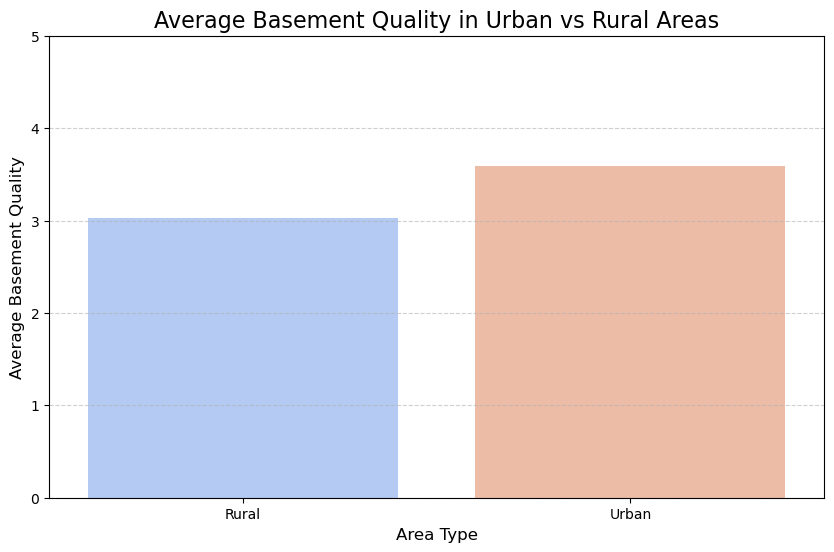

In [32]:

urban_zones = ['FV', 'RL', 'RM']  
rural_zones = ['RH', 'A (agr)', 'C (all)', 'I (all)']  


train['Area Type'] = train['MS Zoning'].apply(lambda x: 'Urban' if x in urban_zones else 'Rural')


bsmt_mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
train['Bsmt Qual'] = train['Bsmt Qual'].map(bsmt_mapping)


avg_bsmt_qual = train.groupby('Area Type')['Bsmt Qual'].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(data=avg_bsmt_qual, x='Area Type', y='Bsmt Qual', palette='coolwarm')


plt.title('Average Basement Quality in Urban vs Rural Areas', fontsize=16)
plt.xlabel('Area Type', fontsize=12)
plt.ylabel('Average Basement Quality', fontsize=12)
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.6)


plt.show()
